In [ ]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [ ]:
#load data
trafficdf=pd.read_csv('/content/Traffic.csv')

In [ ]:
#view data
trafficdf.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
trafficdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2976 entries, 0 to 2975
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Time               2976 non-null   object
 1   Date               2976 non-null   int64 
 2   Day of the week    2976 non-null   object
 3   CarCount           2976 non-null   int64 
 4   BikeCount          2976 non-null   int64 
 5   BusCount           2976 non-null   int64 
 6   TruckCount         2976 non-null   int64 
 7   Total              2976 non-null   int64 
 8   Traffic Situation  2976 non-null   object
dtypes: int64(6), object(3)
memory usage: 209.4+ KB


In [ ]:
trafficdf.isnull().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
#prepare independent and dependent variables
inp=trafficdf[['Total']]
out=trafficdf['Traffic Situation']

In [ ]:
#create an instance of LR
LR=LinearRegression()

In [ ]:
from sklearn.preprocessing import LabelEncoder

#train the model
df_cleaned = trafficdf.dropna(subset=['Total', 'Traffic Situation'])

inp_cleaned = df_cleaned[['Total']]

# Initialize LabelEncoder
le = LabelEncoder()
# Fit and transform the 'Traffic Situation' column to numerical labels
out_cleaned_encoded = le.fit_transform(df_cleaned['Traffic Situation'])

encoded_values = [0,1]   # example

LR.fit(inp_cleaned, out_cleaned_encoded)

LinearRegression()

In [ ]:
LR.predict([[5]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([3.78137382])

In [ ]:
labels = ['CarCount', '	BikeCount', 'BusCount', 'Total','Traffic Situation']
sizes = [30, 25, 20, 25,20]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']

([<matplotlib.patches.Wedge at 0x7e28d1cc0cb0>,
 [Text(-1.0958141611915575, -0.09587139371075998, 'CarCount'),
  Text(-0.04798104140339809, -1.0989530561702103, '\tBikeCount'),
  Text(0.9969384658875002, -0.4648803020497617, 'BusCount'),
  Text(0.8110048735373878, 0.7431494433144694, 'Total'),
  Text(-0.37622243468686517, 1.0336617820342822, 'Traffic Situation')],
 [Text(-0.5977168151953949, -0.05229348747859634, '25.0%'),
  Text(-0.026171477129126226, -0.5994289397292056, '20.8%'),
  Text(0.5437846177568182, -0.2535710738453245, '16.7%'),
  Text(0.4423662946567569, 0.40535424180789237, '20.8%'),
  Text(-0.20521223710192646, 0.5638155174732448, '16.7%')])

/usr/local/lib/python3.12/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


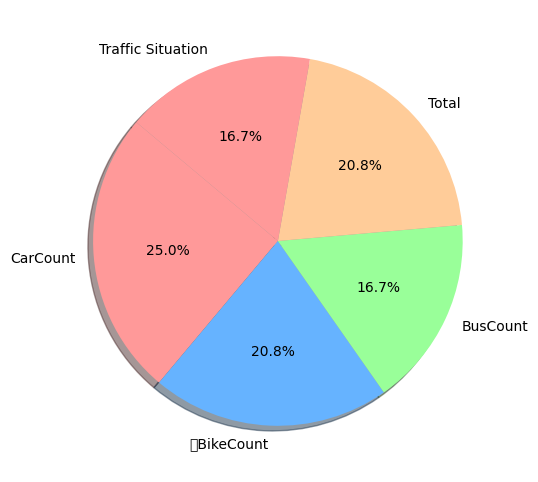

In [ ]:
plt.figure(figsize=(6,6))
plt.pie(
    sizes,
    labels=labels,
    colors=colors,
    autopct='%1.1f%%',
    shadow=True,
    startangle=140
)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


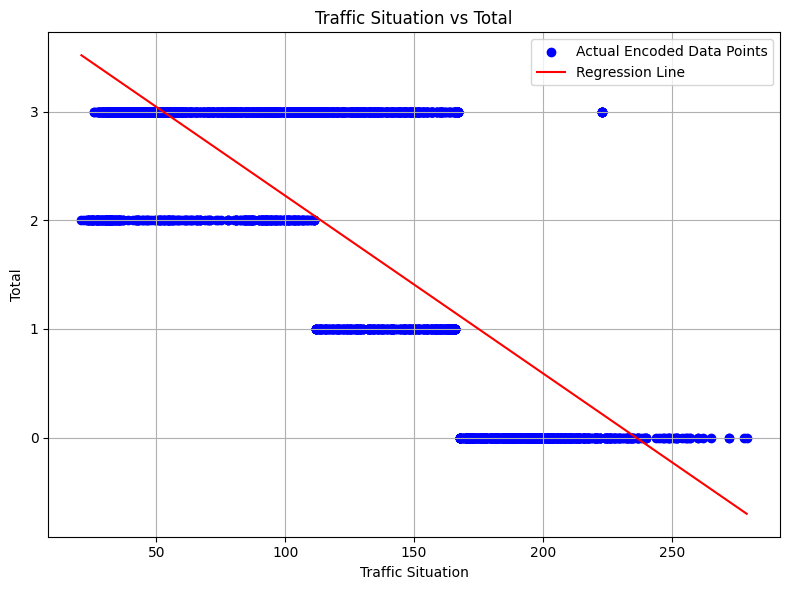

In [ ]:
plt.figure(figsize=(8,6))
# Create a range of values for 'Total' to plot the regression line
inp_line = np.linspace(inp_cleaned['Total'].min(), inp_cleaned['Total'].max(), 100).reshape(-1, 1)
# Predict the corresponding 'Traffic Situation' encoded values
out_line = LR.predict(inp_line)

plt.scatter(inp_cleaned, out_cleaned_encoded, color='blue', label='Actual Encoded Data Points')
plt.plot(inp_line, out_line, color='red', label='Regression Line')
plt.xlabel("Traffic Situation")
plt.ylabel("Total")
plt.title("Traffic Situation vs Total")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
import pickle
with open("traffic.pkl","wb") as f:
  pickle.dump(LR,f)
from google.colab import files
files.download('traffic.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>